# Chapter 2

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
pwd= os.getcwd()
filepath= os.path.join(pwd,"housing.csv")
filepath

'c:\\Users\\abhin\\Documents\\ML_HandsON\\housing.csv'

In [3]:
housing_data=pd.read_csv(filepath)
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Note how total_bedrooms has fewer entries. We will have to take care of it later. To view ocean_proximity text values:

<AxesSubplot:>

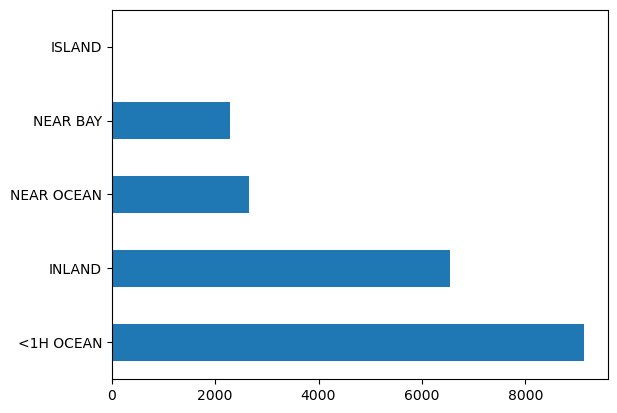

In [5]:
housing_data["ocean_proximity"].value_counts().plot(kind="barh")

In [6]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

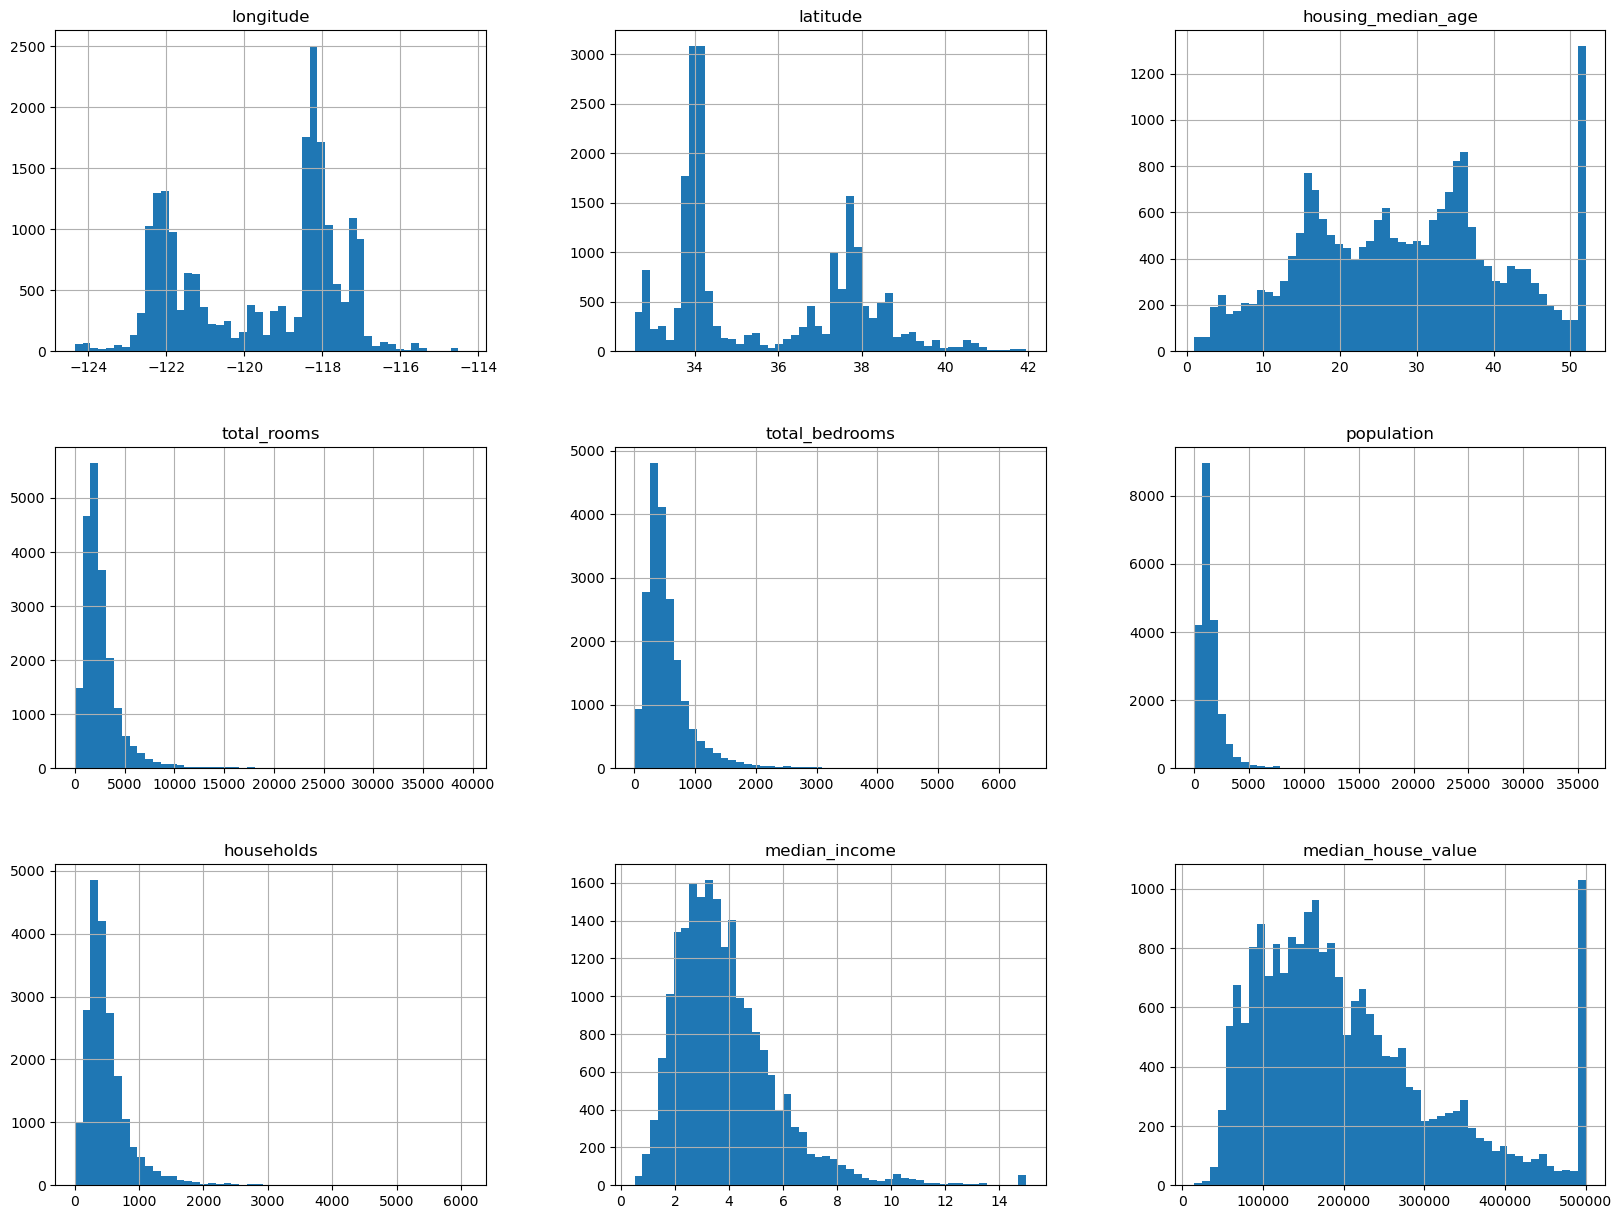

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(20,15))

Median House values and ages are capped. If we need proper predictions at higher values, either collect proper labels for the districts which were capped or remove those districts from the training set.

Attributes have different scales, we need feature scaling. Many histograms are tail heavy, we try to transform these into bell shaped curves. 

In [8]:
y=housing_data["median_house_value"]
X=housing_data.drop("median_house_value",axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


# Split Datasets


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2852,-118.96,35.38,41.0,2417.0,435.0,973.0,406.0,3.0568,INLAND
9961,-122.26,38.33,34.0,2048.0,316.0,780.0,267.0,5.8150,NEAR BAY
13947,-117.20,34.24,22.0,8106.0,1665.0,1062.0,423.0,3.0434,INLAND
2299,-119.76,36.82,17.0,6932.0,1486.0,3056.0,1453.0,2.3375,INLAND
6462,-118.06,34.10,42.0,1576.0,313.0,697.0,282.0,4.3523,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
5734,-118.23,34.16,31.0,3105.0,582.0,1359.0,547.0,5.1718,<1H OCEAN
6127,-117.94,34.10,31.0,1239.0,254.0,929.0,244.0,3.3625,<1H OCEAN
18370,-121.93,37.13,37.0,1150.0,203.0,511.0,179.0,5.7415,<1H OCEAN
20059,-119.27,35.87,12.0,972.0,269.0,1134.0,286.0,1.6300,INLAND


### Stratified Split

Suppose you chatted with experts who told you that the median income is a very
important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset.



<AxesSubplot:>

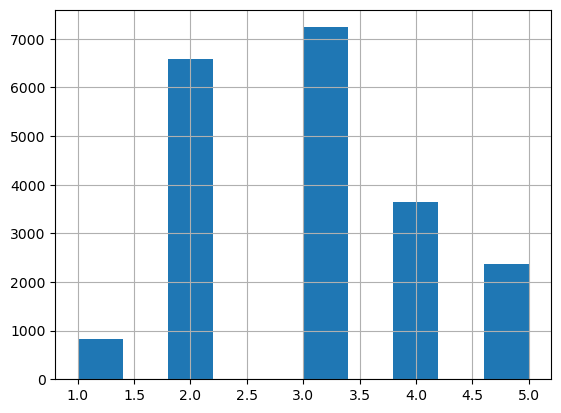

In [10]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])
 
housing_data["income_cat"].hist()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
 strat_train_set = housing_data.loc[train_index]
 strat_test_set = housing_data.loc[test_index]
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [12]:
housing_data["income_cat"].value_counts() / len(housing_data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

Stratified test split worked, distribution of values with the income cap is similar in the data set and the test set. Time to remove the income_cap feature.

In [13]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)

# Visualizing our Data

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

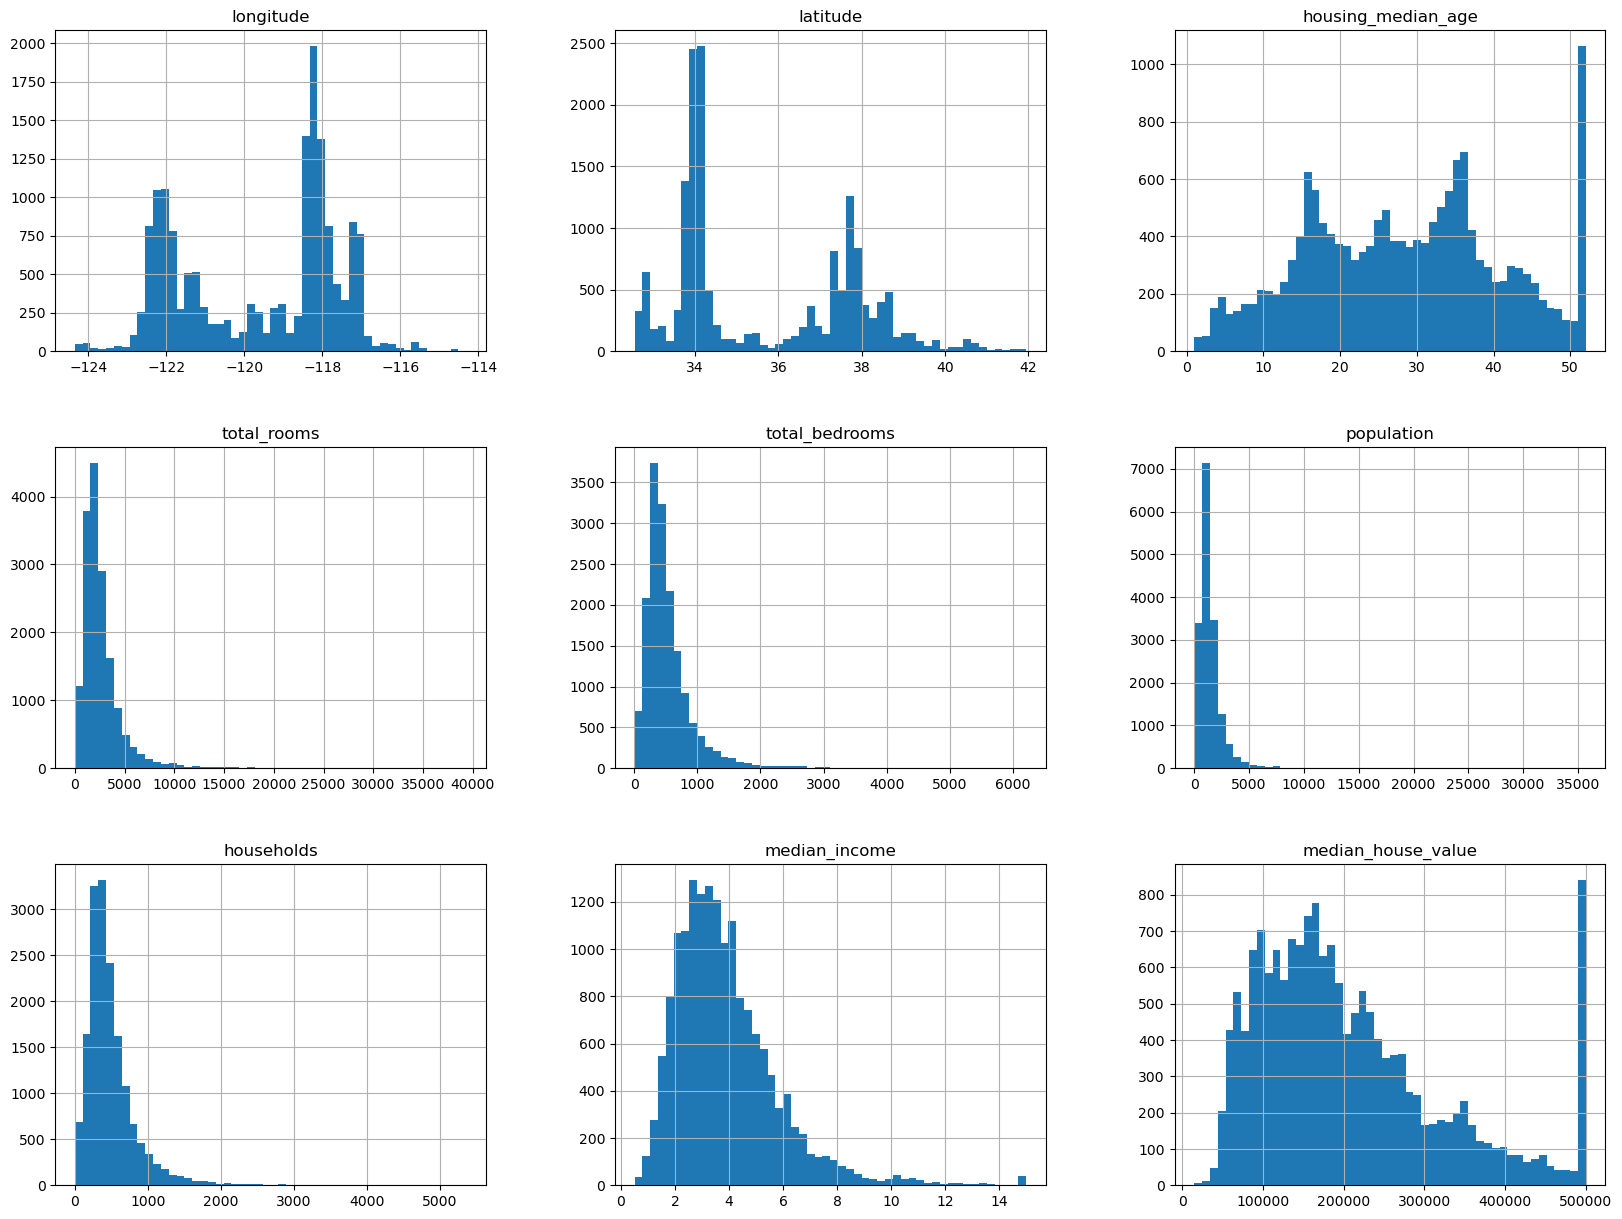

In [14]:
housing=strat_train_set.copy()
housing.hist(bins=50,figsize=(20,15))

### Geographic Data

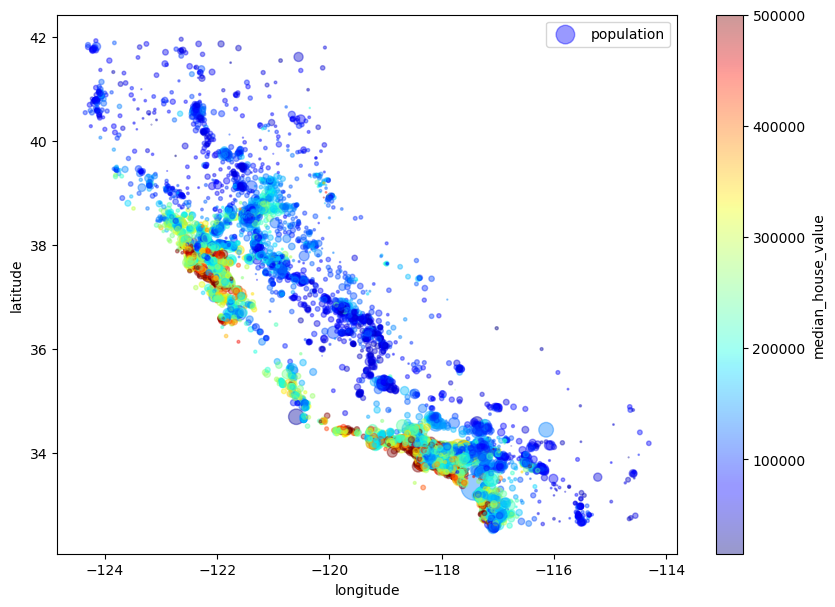

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

### Correlation Matrices

In [16]:
corr=housing.corr()

<AxesSubplot:>

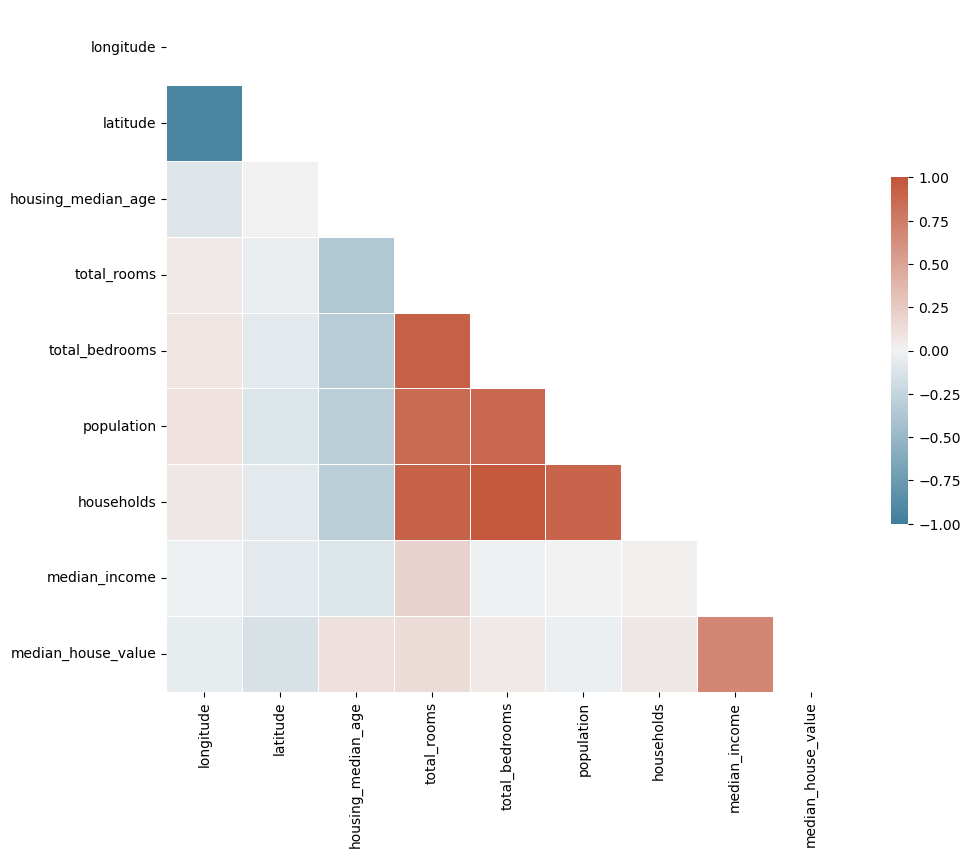

In [17]:
import seaborn as sns

mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax=plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,vmin=-1,center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})

### Prepping the Data

Preparation of the Data is the longest step. We can use the following transformations, not in this particular order:
* Feature Engineering: Creating new features (columns) out of raw data using domain knowledge.
* Imputation: Inserting values where they might be missing to have a complete dataset.
* Encoding Categorical Variables: Transforming categorical variables into some numerical variation. Changing text to numbers put simply.
* Scaling

In [18]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### Dealing with missing values
* Get rid of the corresponding districts.
* Get rid of the whole attribute.
* Set the values to some value (zero, the mean, the median, etc.).


In [19]:
median = housing["total_bedrooms"].median()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


#### Encode Categorical Variables

Replace ocean proximity with numbers.

In [20]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)


,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [21]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]


array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [22]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

#### Feature Engineering

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
 def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
  self.add_bedrooms_per_room = add_bedrooms_per_room
 def fit(self, X, y=None):
  return self # nothing else to do
 def transform(self, X, y=None):
  rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
  population_per_household = X[:, population_ix] / X[:, households_ix]
  if self.add_bedrooms_per_room:
    bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
    return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
  else:
    return np.c_[X, rooms_per_household, population_per_household]
#attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
#housing_extra_attribs = pd.DataFrame(attr_adder.transform(housing.values))
#housing_extra_attribs
def feature_engineering(data):
  data["bedrooms_per_household"]=data["total_bedrooms"]/data["households"]
  data["population_per_household"]=data["population"]/data["households"]
  data["rooms_per_household"]=data["total_rooms"]/data["households"]
  return data
housing_add_features=feature_engineering(housing_num)
housing_add_features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.128895,3.168555,5.485836
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,1.113281,2.623698,6.927083
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.033333,2.223333,5.393333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,1.074534,1.859213,3.886128
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.113793,3.167241,6.096552
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.229770,2.023976,6.658342
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,1.002821,3.363188,5.571932
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0.965116,2.662791,4.110465
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.157685,2.411178,6.297405


#### Scaling Data

ML model may consider higher values to be more important.
z= (x-u)/s

u is mean, s is standard deviation

In [24]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

housing_scaled=scaler.fit_transform(housing_add_features)
housing_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.05896205,
         0.00622264,  0.01739526],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.02830837,
        -0.04081077,  0.56925554],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.1286475 ,
        -0.07537122, -0.01802432],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.26257303,
        -0.03743619, -0.5092404 ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.11548226,
        -0.05915604,  0.32814891],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.05505203,
         0.00657083,  0.01407228]])

In [25]:
housing=strat_train_set.drop("median_house_value",axis=1)

housing_labels=strat_train_set["median_house_value"].copy()

def data_transform(data):
  # Separate Labels
  if "median_house_value" in data.columns:
    labels=data["median_house_value"]
    data=data.drop("median_house_value",axis=1)
  else: 
    labels=None
  # Feature Engineering
    feature_engineered_data=feature_engineering(data)
    features = list(feature_engineered_data.colums)# creating list of features for future use.
  # Imputing Data
    from sklearn.impute import SimpleImputer
    imputer=SimpleImputer(strategy="median")
    housing_num=feature_engineered_data.select_dtypes(include=[np.number])
    imputed=imputer.fit_transform(housing_num)
  # Encoding Categorical Data
    housing_cat=feature_engineered_data.select_dtypes(exclude=[np.number])
    from sklearn.preprocessing import OneHotEncoder
    cat_encoder=OneHotEncoder(sparse=False)
    housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
    features=features+cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity")

  # Scaling numerical data
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()
    housing_scaled=scaler.fit_transform(imputed)

  # Concatening data
    output= np.hstack([housing_scaled,housing_cat_1hot])

    return output, labels, features


# Training a Model

In [1]:
#train_data, train_labels, features= data_transform(strat_train_set)